In [2]:
from PIL import Image

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
imgname = 'groening.jpg'
imgurl = './' + imgname

In [5]:
img = Image.open(imgurl)

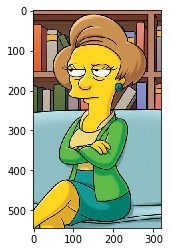

In [6]:
plt.figure('img')
plt.imshow(img)
plt.show()

In [7]:
x = np.array(img)

In [8]:
np.shape(x)

(544, 320, 3)

In [9]:
import time
dist = np.zeros(np.shape(x)[0:2])
begint = time.time()
for i in range(np.shape(x)[0]-2):
    ii = i + 1
    for j in range(np.shape(x)[1]-2):
        jj = j + 1
        pix = np.zeros([3,3,3])
        for k in range(3):
            for l in range(3):
                pix[k,l,:] = x[ii+k-1,jj+l-1,:]
        dist[ii,jj] = np.sqrt(np.sum(np.square(pix-pix[1,1,:])))
endt = time.time()
print('total time: %.2fs'%(endt-begint))

total time: 4.42s


In [10]:
from sklearn.preprocessing import scale

In [11]:
np.shape(dist)

(544, 320)

In [12]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def relu(x):
    return x*(x>0)

In [13]:
scaled_dist = scale(dist)

In [14]:
scaled_dist

array([[ 0.        , -0.70742367, -0.7119018 , ..., -0.45705147,
        -0.45516653,  0.        ],
       [ 0.        , -0.60389232, -0.60559247, ..., -0.27406803,
        -0.24305114,  0.        ],
       [ 0.        , -0.58176328, -0.5737766 , ..., -0.29723063,
        -0.26434259,  0.        ],
       ..., 
       [ 0.        ,  0.02207777, -0.05643899, ..., -0.45705147,
        -0.45516653,  0.        ],
       [ 0.        , -0.04095978,  0.92646924, ..., -0.45705147,
        -0.45516653,  0.        ],
       [ 0.        , -0.70742367, -0.7119018 , ..., -0.45705147,
        -0.45516653,  0.        ]])

In [15]:
p = 1
sig_dist = sigmoid(p*scaled_dist)

In [16]:
relu_dist = relu(scaled_dist)

In [17]:
threshold = 0.8
twovalued_sig_dist = sig_dist>=threshold

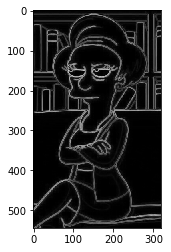

In [33]:
plt.figure('dist')
plt.imshow(dist, cmap='gray')
plt.savefig('./'+'dist_'+imgname)
plt.show()


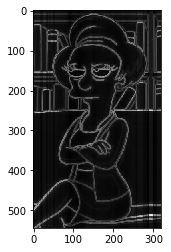

In [34]:
plt.figure('scaled')
plt.imshow(scaled_dist,cmap='gray')
plt.savefig('./'+'scaled_'+imgname)
plt.show()


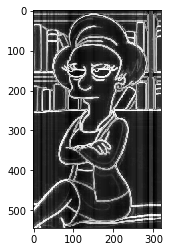

In [35]:
plt.figure('sigmoid dist')
plt.imshow(sig_dist,cmap='gray')
plt.savefig('./'+'sig_dist_'+imgname)
plt.show()


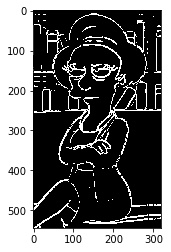

In [36]:
plt.figure('01 sigmoid dist')
plt.imshow(twovalued_sig_dist,cmap='gray')
plt.savefig('./'+'01_sig_dist_'+imgname)
plt.show()


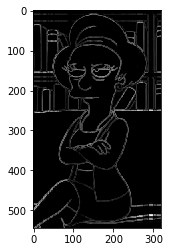

In [32]:
plt.figure('relu dist')
plt.imshow(relu_dist,cmap='gray')
plt.savefig('./'+'relu_'+imgname)
plt.show()


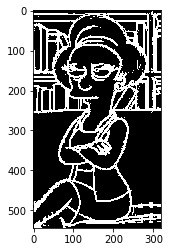

In [37]:
plt.figure('01 dist')
plt.imshow(scaled_dist>=0,cmap='gray')
plt.savefig('./'+'01_'+imgname)
plt.show()


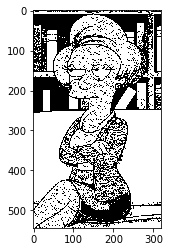

In [27]:
plt.figure('original')
plt.imshow(img.point(lambda x: 255 if x > 128 else 0).convert('1'),cmap='gray')
plt.show()

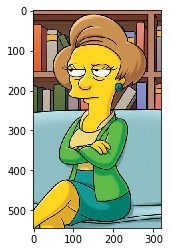

In [28]:
plt.figure('img')
plt.imshow(img)
plt.show()